## Softmax 回归
#### 动手学深度学习 —— Softmax 回归
#### 使用 Pytorch 实现——yujia

**本节学习三个知识点：softmax, 交叉熵损失, Mini-Batch原理**

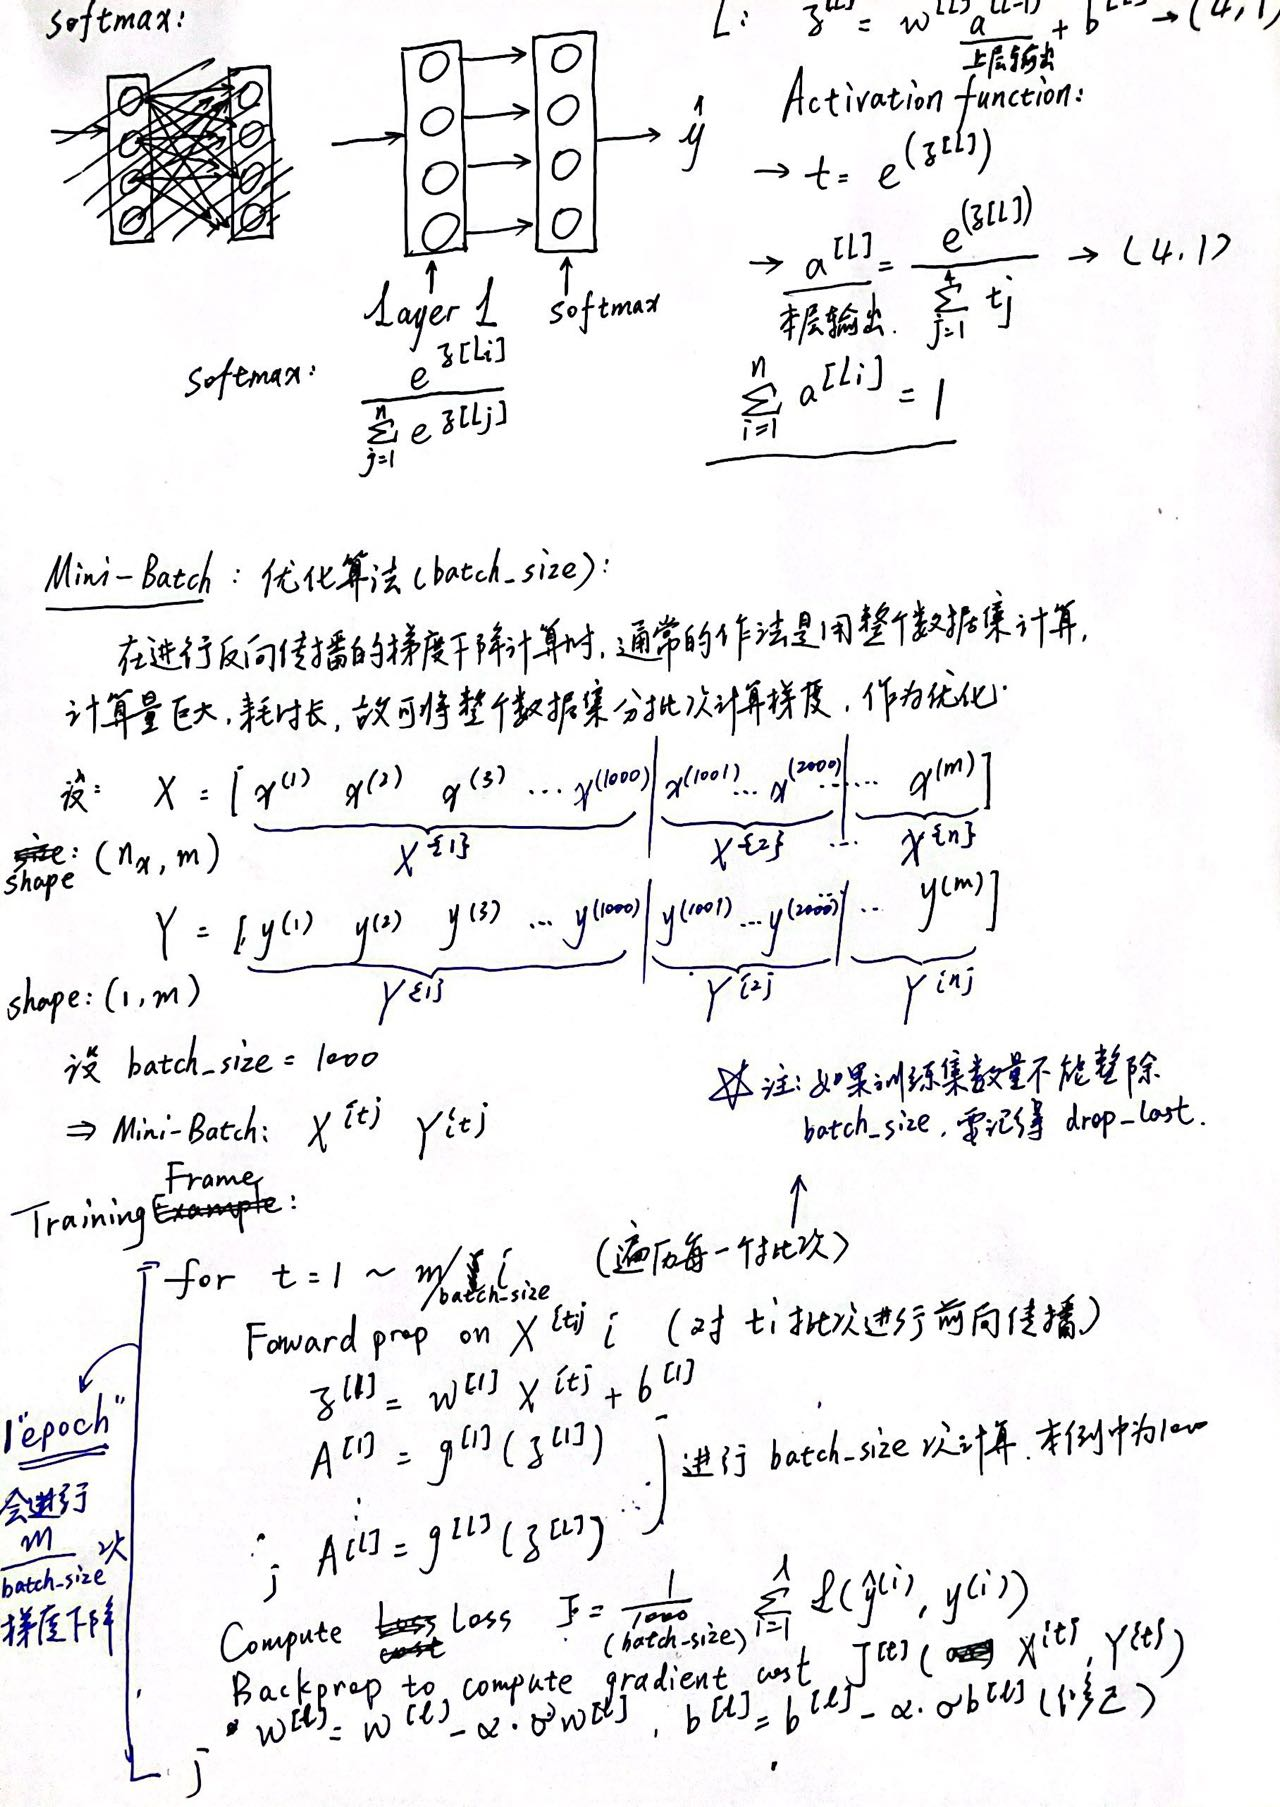

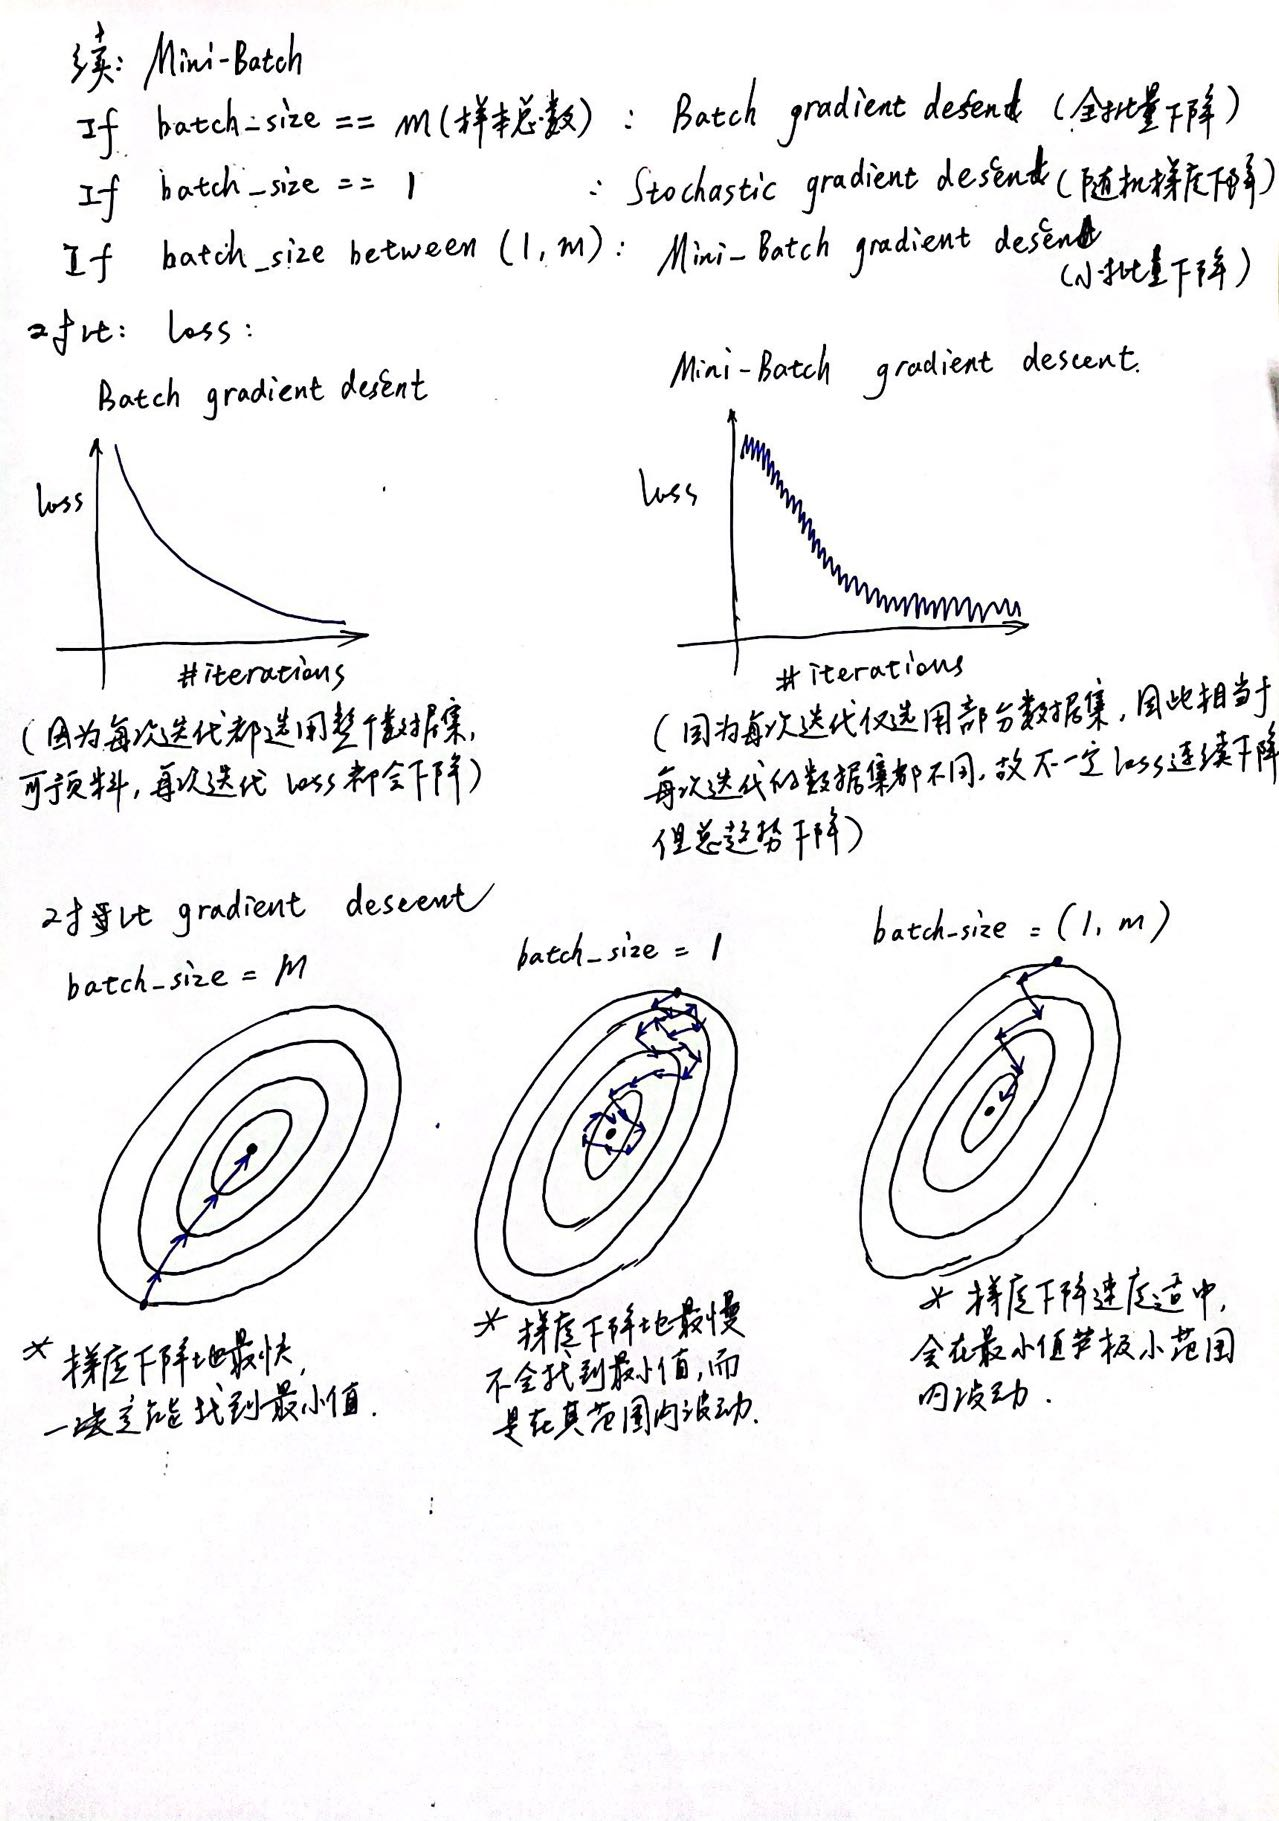

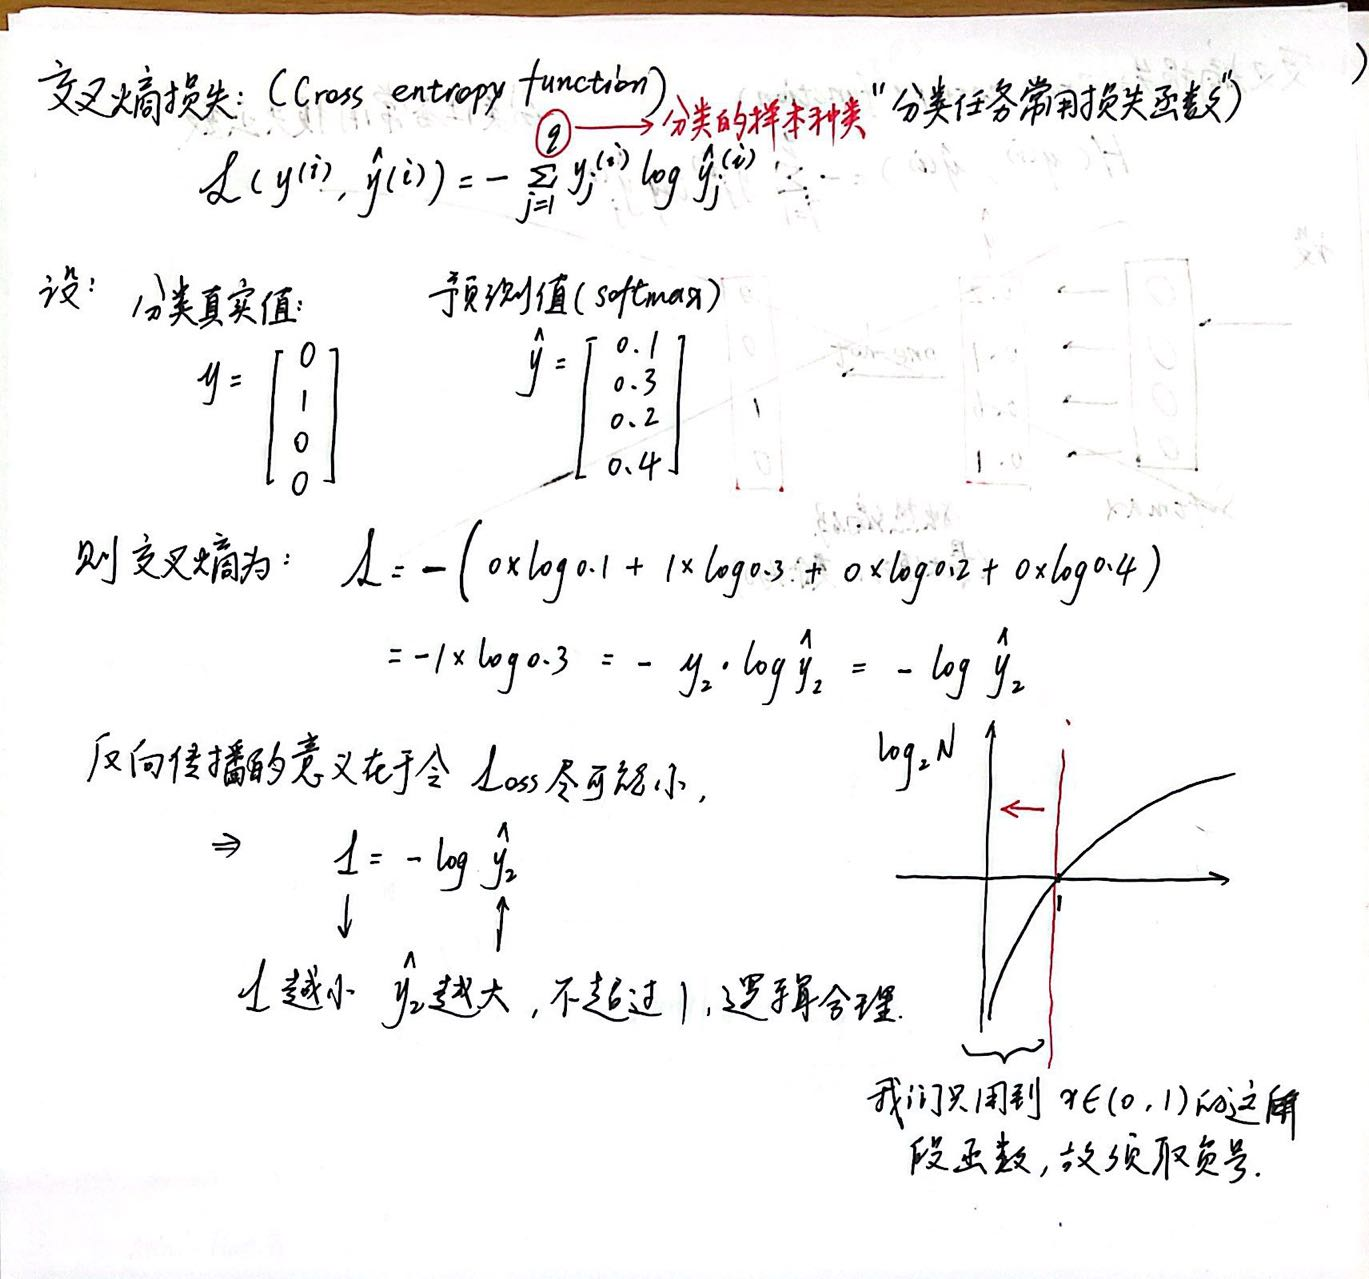

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

**1、数据集的获取**    
这里使用FashionMNIST数据集    
通过torchvision 获取数据集

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./Dataset', #数据集下载后保存到本地的地址
    train=True, #是否为训练数据集
    download=True,  #是否下载，如果是第一次则需要下载
    transform=transforms.ToTensor())#转为张量

test_set = torchvision.datasets.FashionMNIST(
    root='./Dataset', 
    train=False, 
    download=True, 
    transform=transforms.ToTensor())

In [3]:
feature, label = train_set[0]

**加载数据集**    
Dataloader 加载数据集    
num_workers = 并行运算所需要的进程数目    
**drop_last** = 如果最后一个批次不足batch_size 是否丢弃    
这里要特别说明一下，在做训练前，一定要特别注意数据集是否能整除batch_size 不然会出现输入数据量和需要的数据量不同的错误

In [4]:
batch_size = 64
num_workers = 2
classes = train_set.classes

train_iter = DataLoader(
    dataset = train_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)

test_iter = DataLoader(
    dataset = test_set,
    batch_size = batch_size,
    shuffle = True,
    num_workers = num_workers,
    drop_last = True
)

len(train_iter)

937

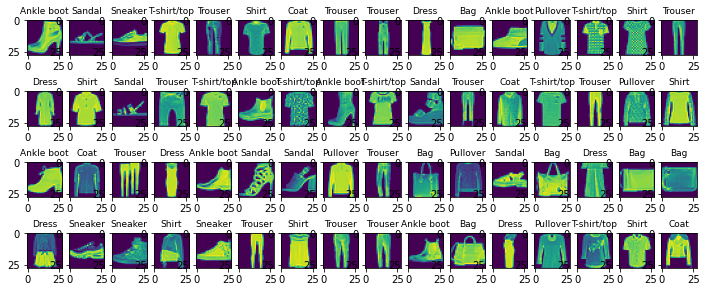

In [5]:
for step, (X, y) in enumerate(train_iter):
    if (step > 0): 
        break
X = X.squeeze().numpy()
y = y.numpy()
plt.figure(figsize = (12,5))
for i in range(len(y)):
    plt.subplot(4, 16, i+1)
    plt.title(classes[y[i]],size=9)
    plt.imshow(X[i])

In [6]:
for step, (X, y) in enumerate(train_iter):
    if (step > 0): 
        break
type(len(y))

int

In [7]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

**2、定义网络**   
Liner层 + softmax 层

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.softmax_net = nn.Sequential(
            nn.Linear(28*28, 10),
            nn.Softmax(1)
        )
    def forward(self, x):
        x = self.softmax_net(x)
        return x
model = Net()

In [9]:
def NetInit(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
model.apply(NetInit)

Net(
  (softmax_net): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)

In [10]:
loss = torch.nn.CrossEntropyLoss()

In [11]:
learning_rate = 0.01
opt = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [12]:
num_epochs = 30
acc_list, loss_list = [], []

for epoch in range(1, num_epochs+1):
    loss_sum, acc_sum= 0.0, 0.0
    n = 0
    for step, (X, y) in enumerate(train_iter):
        pred = model(X.squeeze().view(batch_size,28*28))
        l = loss(pred,y).sum()
        opt.zero_grad()
        l.backward()
        opt.step()
        loss_sum += l
        acc_sum += (pred.argmax(axis=1) == y).sum()
        n+=len(y)
    loss_list.append(loss_sum/n)
    acc_list.append(acc_sum/n)
    print("epoch: %d, loss: %.4f, train_acc: %.4f" % (epoch, loss_sum/n, acc_sum/n))

epoch: 1, loss: 0.0330, train_acc: 0.4650
epoch: 2, loss: 0.0297, train_acc: 0.6596
epoch: 3, loss: 0.0289, train_acc: 0.6786
epoch: 4, loss: 0.0285, train_acc: 0.6833
epoch: 5, loss: 0.0283, train_acc: 0.6889
epoch: 6, loss: 0.0280, train_acc: 0.7098
epoch: 7, loss: 0.0278, train_acc: 0.7375
epoch: 8, loss: 0.0276, train_acc: 0.7492
epoch: 9, loss: 0.0274, train_acc: 0.7558
epoch: 10, loss: 0.0273, train_acc: 0.7603
epoch: 11, loss: 0.0272, train_acc: 0.7639
epoch: 12, loss: 0.0272, train_acc: 0.7673
epoch: 13, loss: 0.0271, train_acc: 0.7694
epoch: 14, loss: 0.0270, train_acc: 0.7715
epoch: 15, loss: 0.0270, train_acc: 0.7730
epoch: 16, loss: 0.0269, train_acc: 0.7744
epoch: 17, loss: 0.0269, train_acc: 0.7762
epoch: 18, loss: 0.0268, train_acc: 0.7773
epoch: 19, loss: 0.0268, train_acc: 0.7787
epoch: 20, loss: 0.0268, train_acc: 0.7797
epoch: 21, loss: 0.0268, train_acc: 0.7808
epoch: 22, loss: 0.0267, train_acc: 0.7820
epoch: 23, loss: 0.0267, train_acc: 0.7828
epoch: 24, loss: 0.0

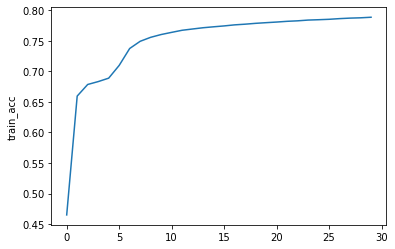

In [13]:
plt.ylabel('train_acc')
plt.plot(range(len(acc_list)),acc_list)

In [14]:
torch.save(model,"./model/softmax.pkl")
test_model = torch.load("./model/softmax.pkl")

tensor([[3.6132e-06, 5.7258e-06, 8.1542e-05, 2.0950e-05, 3.6679e-04, 1.0012e-01,
         4.1952e-05, 9.3672e-02, 1.1621e-02, 7.9407e-01]],
       grad_fn=<SoftmaxBackward0>)

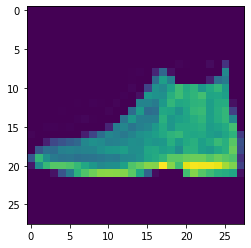

In [15]:
test_img, test_label = test_set[0]
plt.imshow(test_img.squeeze())
test_img = test_img.view(1,28*28)
test_label = test_model(test_img)
test_label
# pred_label = classes[test_label]
# print(classes[test_label],pred_label)

In [16]:
for i in range(10,100):
    test_img, test_label = test_set[i]
    test_img = test_img.view(1,28*28)
    test_pred = classes[model(test_img).argmax(axis = 1)]
    print(classes[test_label],test_pred)

Coat Coat
Sandal Sandal
Sneaker Sandal
Dress Dress
Coat Coat
Trouser Trouser
Pullover Pullover
Coat Coat
Bag Bag
T-shirt/top T-shirt/top
Pullover T-shirt/top
Sandal Sneaker
Sneaker Sneaker
Ankle boot Sneaker
Trouser Trouser
Coat Pullover
Shirt Coat
T-shirt/top Dress
Ankle boot Ankle boot
Dress Coat
Bag Bag
Bag Bag
Dress Dress
Dress Dress
Bag Bag
T-shirt/top T-shirt/top
Sneaker Sneaker
Sandal Sandal
Sneaker Sneaker
Ankle boot Ankle boot
Shirt T-shirt/top
Trouser Trouser
Dress T-shirt/top
Sneaker Ankle boot
Shirt Coat
Sneaker Ankle boot
Pullover Pullover
Trouser Trouser
Pullover Coat
Pullover Pullover
Coat Coat
Coat Pullover
Sandal Sandal
Bag Pullover
Pullover Coat
Pullover Pullover
Bag Bag
Coat Coat
Bag Bag
T-shirt/top T-shirt/top
Sneaker Sneaker
Sneaker Sneaker
Bag Bag
Sandal Sandal
Trouser Trouser
Trouser Trouser
Pullover Dress
Dress Coat
Ankle boot Sneaker
Bag Bag
Sneaker Sneaker
T-shirt/top T-shirt/top
Pullover Pullover
Shirt T-shirt/top
Pullover Coat
Dress Dress
Trouser Trouser
Pul